# ICE-4 Text Data: Flattening, Filtering, and Chunking

## (Tutorial) Bag of X
Following is a sample of applying bag of n-grams to Yelp academic dataset review, please download it with following link:

https://github.com/knowitall/yelp-dataset-challenge/blob/master/data/yelp_phoenix_academic_dataset/yelp_academic_dataset_review.json

In [1]:
import pandas as pd
import json

In [3]:
f = open('/Users/laptopcheckout/Downloads/yelp_academic_dataset_review.json')
js = []
for i in range(10000):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

(10000, 8)

In [4]:
review_df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


note: in the default settings of CountVectorizer, the token_pattern = '(?u)\\b\\w\\w+\\b', which ignores single-character words. Whe employ the token_pattern = '(?u)\\b\\w+\\b' to include the single-character words. 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
x = bow_converter.fit_transform(review_df['text'])

In [6]:
unigram = bow_converter.get_feature_names()

In [7]:
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(review_df['text'])

In [8]:
bigram = bigram_converter.get_feature_names()

In [9]:
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(review_df['text'])

In [10]:
trigram = trigram_converter.get_feature_names()

In [11]:
unigram

['0',
 '00',
 '000',
 '007',
 '00a',
 '00am',
 '00pm',
 '01',
 '02',
 '03',
 '03342',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0buxoc0crqjpvkezo3bqog',
 '0l',
 '0tzg',
 '1',
 '10',
 '100',
 '1000',
 '1000x',
 '1001',
 '100lbs',
 '100s',
 '100th',
 '101',
 '102',
 '102729',
 '1030',
 '104',
 '105',
 '1070',
 '107f',
 '108',
 '109',
 '10am',
 '10ish',
 '10k',
 '10min',
 '10mins',
 '10minutes',
 '10oz',
 '10p',
 '10pm',
 '10th',
 '10x',
 '10yo',
 '11',
 '110',
 '1100',
 '111',
 '111th',
 '112',
 '113',
 '1130',
 '114',
 '1145',
 '115',
 '115th',
 '116',
 '117',
 '118',
 '11a',
 '11am',
 '11p',
 '11pm',
 '11th',
 '11year',
 '12',
 '120',
 '1200',
 '12000',
 '1202',
 '123',
 '124',
 '125',
 '128i',
 '129',
 '12a',
 '12am',
 '12k',
 '12oz',
 '12pm',
 '12th',
 '13',
 '130',
 '1300',
 '13331',
 '135',
 '13th',
 '13yr',
 '14',
 '140',
 '147',
 '149',
 '14lbs',
 '15',
 '150',
 '1500',
 '150k',
 '150mm',
 '157',
 '15am',
 '15ft',
 '15min',
 '15mins',
 '15pm',
 '15th',
 '16',
 '160',
 '1600',
 

In [12]:
bigram

['0 0',
 '0 20',
 '0 39',
 '0 5',
 '0 50',
 '0 6',
 '0 75',
 '0 90',
 '0 95',
 '0 99',
 '0 after',
 '0 eye',
 '0 inch',
 '0 or',
 '0 ph',
 '0 simply',
 '0 so',
 '0 star',
 '0 stars',
 '0 that',
 '00 25',
 '00 3',
 '00 6',
 '00 9',
 '00 a',
 '00 after',
 '00 am',
 '00 amazing',
 '00 and',
 '00 apiece',
 '00 appetizers',
 '00 at',
 '00 banana',
 '00 basket',
 '00 beam',
 '00 before',
 '00 bill',
 '00 brown',
 '00 bucks',
 '00 burger',
 '00 burgers',
 '00 but',
 '00 charge',
 '00 cheaper',
 '00 cover',
 '00 credit',
 '00 diagnostic',
 '00 did',
 '00 draft',
 '00 drink',
 '00 drinks',
 '00 each',
 '00 entree',
 '00 etc',
 '00 everyday',
 '00 extra',
 '00 food',
 '00 for',
 '00 game',
 '00 get',
 '00 gets',
 '00 gift',
 '00 great',
 '00 had',
 '00 happy',
 '00 held',
 '00 here',
 '00 i',
 '00 into',
 '00 is',
 '00 ish',
 '00 it',
 '00 jeans',
 '00 machine',
 '00 machines',
 '00 margaritas',
 '00 minimum',
 '00 my',
 '00 night',
 '00 no',
 '00 normally',
 '00 not',
 '00 of',
 '00 off',
 '00 

In [13]:
trigram

['0 0 eye',
 '0 20 less',
 '0 39 oz',
 '0 39 pizza',
 '0 5 i',
 '0 50 to',
 '0 6 can',
 '0 75 oysters',
 '0 75 that',
 '0 75 to',
 '0 90 well',
 '0 95 if',
 '0 99 for',
 '0 after rebates',
 '0 eye candy',
 '0 inch sub',
 '0 or 1',
 '0 ph version',
 '0 simply put',
 '0 so i',
 '0 star option',
 '0 stars for',
 '0 stars i',
 '0 stars just',
 '0 stars this',
 '0 that s',
 '00 25 00',
 '00 3 burger',
 '00 6 00',
 '00 9 00',
 '00 a burger',
 '00 a cupcake',
 '00 a day',
 '00 a m',
 '00 a night',
 '00 a piece',
 '00 a pitcher',
 '00 after i',
 '00 am before',
 '00 am every',
 '00 am like',
 '00 am on',
 '00 am or',
 '00 am they',
 '00 am where',
 '00 amazing appetizer',
 '00 and 4',
 '00 and dinner',
 '00 and it',
 '00 and that',
 '00 and the',
 '00 and there',
 '00 and they',
 '00 and was',
 '00 and you',
 '00 apiece however',
 '00 appetizers we',
 '00 at 9',
 '00 banana republic',
 '00 basket fries',
 '00 beam 5',
 '00 before tip',
 '00 bill they',
 '00 brown rice',
 '00 bucks for',
 '00 b

In [14]:
print (len(unigram), len(bigram), len(trigram))

29222 368943 881620


In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>


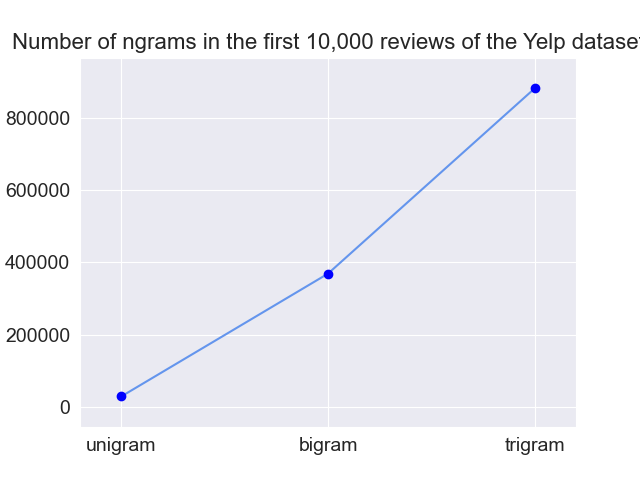

In [16]:
sns.set_style("darkgrid")
counts = [len(unigram), len(bigram), len(trigram)]
plt.plot(counts, color='cornflowerblue')
plt.plot(counts, 'bo')
plt.margins(0.1)
plt.xticks(range(3), ['unigram', 'bigram', 'trigram'])
plt.tick_params(labelsize=14)
plt.title('Number of ngrams in the first 10,000 reviews of the Yelp dataset', {'fontsize':16})
plt.show()

## Task 1. 1 Applying the unigram, bigram, and trigram tokenization methods to the given text below. 

In [1]:
train_text = """My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  
I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  
It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!"""



In [3]:
train_text = """My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  
Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  
I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  
It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  
It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!"""

# write your code here 
import nltk
list_train_text=train_text.split(".")
#print(list_train_text)

from sklearn.feature_extraction.text import CountVectorizer
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
x = bow_converter.fit_transform(list_train_text)


bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
x2 = bigram_converter.fit_transform(list_train_text)

trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')
x3 = trigram_converter.fit_transform(list_train_text)

unigram = bow_converter.get_feature_names()
bigram = bigram_converter.get_feature_names()
trigram = trigram_converter.get_feature_names()

In [59]:
unigram

['2',
 'a',
 'absolute',
 'absolutely',
 'amazing',
 'an',
 'and',
 'anyway',
 'arrived',
 'back',
 'best',
 'better',
 'birthday',
 'blend',
 'bloody',
 'bread',
 'breakfast',
 'busy',
 'came',
 'can',
 'complete',
 'delicious',
 'do',
 'earlier',
 'eggs',
 'ever',
 'everything',
 'excellent',
 'favor',
 'fills',
 'food',
 'for',
 'fresh',
 'from',
 'garden',
 'get',
 'go',
 'griddled',
 'grounds',
 'had',
 'here',
 'i',
 'ingredients',
 'it',
 'like',
 'looked',
 'looks',
 'm',
 'made',
 'mary',
 'me',
 'meal',
 'menu',
 'morning',
 'my',
 'of',
 'on',
 'only',
 'order',
 'our',
 'outside',
 'overlooking',
 'perfect',
 'phenomenal',
 'pieces',
 'place',
 'pleasure',
 'pretty',
 'quickly',
 'saturday',
 'scrambled',
 'semi',
 'simply',
 'sitting',
 'skillet',
 'so',
 'sure',
 't',
 'tasty',
 'the',
 'their',
 'them',
 'they',
 'to',
 'toast',
 'took',
 'truffle',
 'up',
 'use',
 've',
 'vegetable',
 'wait',
 'waitress',
 'was',
 'weather',
 'when',
 'which',
 'while',
 'white',
 'wife

In [60]:
bigram

['2 pieces',
 'a favor',
 'absolute pleasure',
 'absolutely made',
 'amazing and',
 'an absolute',
 'and blend',
 'and delicious',
 'and get',
 'and it',
 'and our',
 'and simply',
 'anyway i',
 'arrived quickly',
 'best i',
 'best toast',
 'birthday for',
 'blend them',
 'bloody mary',
 'bread with',
 'breakfast and',
 'busy saturday',
 'came with',
 'can t',
 'do yourself',
 'earlier you',
 'eggs vegetable',
 'ever had',
 'everything on',
 'excellent and',
 'excellent i',
 'favor and',
 'fills up',
 'food arrived',
 'for breakfast',
 'fresh when',
 'from their',
 'garden and',
 'get here',
 'get their',
 'go back',
 'griddled bread',
 'grounds an',
 'had the',
 'here on',
 'here the',
 'i can',
 'i had',
 'i m',
 'i ve',
 'ingredients from',
 'it absolutely',
 'it came',
 'it looked',
 'it was',
 'like the',
 'looked like',
 'looks excellent',
 'm pretty',
 'made sitting',
 'made the',
 'me here',
 'meal complete',
 'menu looks',
 'my birthday',
 'my wife',
 'of their',
 'on my',
 'o

In [61]:
trigram

['2 pieces of',
 'a favor and',
 'absolutely made the',
 'amazing and it',
 'an absolute pleasure',
 'and blend them',
 'and get their',
 'and it absolutely',
 'and it was',
 'and our food',
 'and simply the',
 'anyway i can',
 'arrived quickly on',
 'best i ve',
 'best toast i',
 'birthday for breakfast',
 'blend them fresh',
 'bread with was',
 'breakfast and it',
 'busy saturday morning',
 'came with 2',
 'can t wait',
 'do yourself a',
 'earlier you get',
 'eggs vegetable skillet',
 'everything on the',
 'excellent and our',
 'excellent i had',
 'favor and get',
 'fills up pretty',
 'food arrived quickly',
 'for breakfast and',
 'fresh when you',
 'from their garden',
 'garden and blend',
 'get here the',
 'get their bloody',
 'griddled bread with',
 'grounds an absolute',
 'had the white',
 'here on my',
 'here the better',
 'i can t',
 'i had the',
 'i m pretty',
 'i ve ever',
 'ingredients from their',
 'it absolutely made',
 'it came with',
 'it looked like',
 'it was amazing',

## Task 1.2 Create your own naive tokenization method (whitespace-based), and apply it to the text given in the task 1.1
note: 1. do not use the existing togkenization methods given by NLP; 2. split the words by whitespace character, the output is more likely as the unigram; 3. no repeating elements in the output.

In [66]:
# write you code here
traintext_split=train_text.split(" ")
traintext_split2 =[]
for i in traintext_split:
    while i not in traintext_split2:
        traintext_split2.append(i)
traintext_split2
        

['My',
 'wife',
 'took',
 'me',
 'here',
 'on',
 'my',
 'birthday',
 'for',
 'breakfast',
 'and',
 'it',
 'was',
 'excellent.',
 '',
 'The',
 'weather',
 'perfect',
 'which',
 'made',
 'sitting',
 'outside',
 'overlooking',
 'their',
 'grounds',
 'an',
 'absolute',
 'pleasure.',
 '\nOur',
 'waitress',
 'excellent',
 'our',
 'food',
 'arrived',
 'quickly',
 'the',
 'semi-busy',
 'Saturday',
 'morning.',
 'It',
 'looked',
 'like',
 'place',
 'fills',
 'up',
 'pretty',
 'so',
 'earlier',
 'you',
 'get',
 'better.\n\nDo',
 'yourself',
 'a',
 'favor',
 'Bloody',
 'Mary.',
 'phenomenal',
 'simply',
 'best',
 "I've",
 'ever',
 'had.',
 "\nI'm",
 'sure',
 'they',
 'only',
 'use',
 'ingredients',
 'from',
 'garden',
 'blend',
 'them',
 'fresh',
 'when',
 'order',
 'it.',
 'amazing.\n\nWhile',
 'EVERYTHING',
 'menu',
 'looks',
 'excellent,',
 'I',
 'had',
 'white',
 'truffle',
 'scrambled',
 'eggs',
 'vegetable',
 'skillet',
 'tasty',
 'delicious.',
 '\nIt',
 'came',
 'with',
 '2',
 'pieces',
 '

## **Question 1**. Given a sentence "He likes cat". In unigram representation, it could be "He", "likes", "cat". In bigram representation, it could be "He likes", "likes cat". In trigram representation, it could be "He likes cat". Explain why the storage and computation cost increase with the growth of n in n-gram methods. 

Answer to Q1: type your answer here: 


N-gram methods is method in nlp which make the text seperate into pieces(tokenisation).
N-gram uses only n-1 words of prior context.
In unigram "he"is one word but has no context,but "he likes" which bigram brings some context and some sense to the sentence.This method can be extended to any number like 3,4,5,15,and so on for better representation.
But mostly general n-gram model has original sequence structure of text and it also has long term dependencies.
We get the context for a cost.That means for the K unique words in a bag of n words requires k^n(k power n) grams,this n grams demand high cost for computation,storage. The increasing n value is directly proprtional to increasing cost(Both storage and computation).

---

## (Tutorial) Stemming and Lemmatization

In [18]:
# import PorterStemmer class form nltk.stem.porter module
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer() 

stem = stemmer.stem('flowers')  
print(f"'flowers' after stemming: {stem}")

stem = stemmer.stem('zeroes')
print(f"'zeroes' after stemming: {stem}")

stem = stemmer.stem('better')
print(f"'better' after stemming: {stem}")

stem = stemmer.stem('sixties')
print(f"'sixties' after stemming: {stem}")

stem = stemmer.stem('goes')
print(f"'goes' after stemming: {stem}")

stem = stemmer.stem('go')
print(f"'go' after stemming: {stem}")

'flowers' after stemming: flower
'zeroes' after stemming: zero
'better' after stemming: better
'sixties' after stemming: sixti
'goes' after stemming: goe
'go' after stemming: go


In [19]:
# import lemmatizer class from nltk.stem module
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()  

lemma = lemmatizer.lemmatize('flowers')   
print(f"'flowers' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('zeros')
print(f"'zeros' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('better')
print(f"'better' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('sixties')
print(f"'sixties' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('goes')
print(f"'goes' after lemmatization: {lemma}")

lemma = lemmatizer.lemmatize('go')
print(f"'go' after lemmatization: {lemma}")

print("\n\n")
lemma = lemmatizer.lemmatize('better', pos='a')   # 'a' denoted ADJECTIVE part-of-speech
print(f"'better' (as an adjective) after lemmatization: {lemma}")

'flowers' after lemmatization: flower
'zeros' after lemmatization: zero
'better' after lemmatization: better
'sixties' after lemmatization: sixty
'goes' after lemmatization: go
'go' after lemmatization: go



'better' (as an adjective) after lemmatization: good


## Task 2. Text filtering for cleaner feature
1. clean the text used in the task 1; 2. remove all punctuations; 3. convert all characters to their lowercase; 4. remove all words in "stopwords"; 5. remove all relatively meaningless words like " 've ", " 's ", etc. 6. after finishing the above operations, apply stemming and lemmatization to the cleaned text respectively.

In [9]:
# write your code here
import nltk
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')

x=train_text.replace(".", "").replace("'s", "").replace(",", "").replace("?","").replace(":","").replace("/r","").replace("/t","").replace("!","")
x=x.replace("\'"," ").replace("\n"," ").replace("\t"," ").replace('"',' ').replace("  "," ")
text=x.lower()

import re
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
clean_train_text = pattern.sub('', text)
print("clean text \n\n",clean_train_text)


clean text 

 wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure  waitress excellent food arrived quickly semi-busy saturday morning looked like place fills pretty quickly earlier get better favor get bloody mary phenomenal simply best ever pretty sure use ingredients garden blend fresh order amazing everything menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious  came 2 pieces griddled bread amazing absolutely made meal complete  best toast ever anyway wait go back


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/laptopcheckout/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laptopcheckout/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
text=clean_train_text.replace("'s", "")
text=text.replace("'ve", "")
text=text.replace("'m", "")
clean_train_text=text.replace("'t", "")

text_sl = clean_train_text.split(" ")
text_lem = ""
text_sem = ""
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

for i  in text_sl:
    stemmer = PorterStemmer()
    stem = stemmer.stem(i)
    text_sem +=(stem +" ")
    lemmatizer = WordNetLemmatizer()
    lemma = lemmatizer.lemmatize(i)
    text_lem += (lemma + " ")

print("stemming output -\n"+text_sem)    
print("\n\nlemmitisation output -\n"+text_lem)

stemming output -
wife took birthday breakfast excel weather perfect made sit outsid overlook ground absolut pleasur  waitress excel food arriv quickli semi-busi saturday morn look like place fill pretti quickli earlier get better favor get bloodi mari phenomen simpli best ever pretti sure use ingredi garden blend fresh order amaz everyth menu look excel white truffl scrambl egg veget skillet tasti delici  came 2 piec griddl bread amaz absolut made meal complet  best toast ever anyway wait go back 


lemmitisation output -
wife took birthday breakfast excellent weather perfect made sitting outside overlooking ground absolute pleasure  waitress excellent food arrived quickly semi-busy saturday morning looked like place fill pretty quickly earlier get better favor get bloody mary phenomenal simply best ever pretty sure use ingredient garden blend fresh order amazing everything menu look excellent white truffle scrambled egg vegetable skillet tasty delicious  came 2 piece griddled bread a

## **Question 2.** Based on the examples and the output of your code, which one has the better performance, Stemming or Lemmatization? Try to analyze it.

**Answer to Q2**: type your answer here


Stemming is the process of getting root form of any word by removing its suffixes.
Lemmatization mostly deals with the morphological analysis in order to retun the dictionary form of the given word.
When we take a close look of the outpus of both the processes we can come to a conclusion that in lemmatization has considerable performance over stemming.
As we go through the output of stemming we can find a couple of words like tasti,delici,piec,griddl,amaz,complet and few other words that doesn't make any proper sense to the sentence.
While if we consider the output of Lemmatization we cannot see any incomplete words or words which doesnt have good meaning or any spelling errors.

---

## (Tutorial) PoS tagging and chunking

**note:** you need to install spacy and textblob modules first for the following codes
If you have problem to install spacy module, try to follow the instruction in the following link:
https://stackoverflow.com/questions/66149878/e053-could-not-read-config-cfg-resumeparser
If you have problem to use textblob module, try to install nltk libraries as shown in the following link:
http://www.nltk.org/data.html

In [12]:
# Load the first 10 reviews
f = open('/Users/laptopcheckout/Downloads/yelp_academic_dataset_review.json')
js = []
for i in range(10):
    js.append(json.loads(f.readline()))
f.close()
review_df = pd.DataFrame(js)
review_df.shape

NameError: name 'json' is not defined

In [2]:
# chunking in spaCy

import spacy
spacy.info('en_core_web_sm')


===================== Info about model 'en_core_web_sm' =====================

lang             en                            
name             core_web_sm                   
license          MIT                           
author           Explosion                     
url              https://explosion.ai          
email            contact@explosion.ai          
description      English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.
sources          [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)'}]
pipeline         ['tagger', 'parser', 'ner']   
version          2.3.1                         
spacy_version    >=2.3.0,<2.4.0                
parent_package   spacy                         
labels           {'tagger': ['$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS

{'lang': 'en',
 'name': 'core_web_sm',
 'license': 'MIT',
 'author': 'Explosion',
 'url': 'https://explosion.ai',
 'email': 'contact@explosion.ai',
 'description': 'English multi-task CNN trained on OntoNotes. Assigns context-specific token vectors, POS tags, dependency parse and named entities.',
 'sources': [{'name': 'OntoNotes 5',
   'url': 'https://catalog.ldc.upenn.edu/LDC2013T19',
   'license': 'commercial (licensed by Explosion)'}],
 'pipeline': ['tagger', 'parser', 'ner'],
 'version': '2.3.1',
 'spacy_version': '>=2.3.0,<2.4.0',
 'parent_package': 'spacy',
 'accuracy': {'las': 89.7572754092,
  'uas': 91.6570115569,
  'token_acc': 99.756964111,
  'las_per_type': {'advmod': {'p': 85.6065101297,
    'r': 84.9512113055,
    'f': 85.2776018577},
   'aux': {'p': 97.9464841319, 'r': 98.0772654442, 'f': 98.0118311613},
   'nsubj': {'p': 95.530627567, 'r': 94.7522887555, 'f': 95.1398662913},
   'root': {'p': 89.5162856958, 'r': 91.1692936754, 'f': 90.3352283866},
   'compound': {'p': 90

In [3]:
nlp = spacy.load("en_core_web_sm")

doc_df = review_df['text'].apply(nlp)
type(doc_df)

NameError: name 'review_df' is not defined

In [23]:
type(doc_df[0])

spacy.tokens.doc.Doc

In [24]:
doc_df[4]

General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I'd be surprised if you don't walk out totally satisfied as I just did. Like I always say..... "Mistakes are inevitable, it's how we recover from them that is important"!!!

Thanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)

In [25]:
for doc in doc_df[4]:
    print(doc.text, doc.pos_, doc.tag_)

General PROPN NNP
Manager PROPN NNP
Scott PROPN NNP
Petello PROPN NNP
is AUX VBZ
a DET DT
good ADJ JJ
egg NOUN NN
! PUNCT .
! PUNCT .
! PUNCT .
Not PART RB
to PART TO
go VERB VB
into ADP IN
detail NOUN NN
, PUNCT ,
but CCONJ CC
let VERB VB
me PRON PRP
assure VERB VB
you PRON PRP
if SCONJ IN
you PRON PRP
have AUX VBP
any DET DT
issues NOUN NNS
( PUNCT -LRB-
albeit SCONJ IN
rare ADJ JJ
) PUNCT -RRB-
speak VERB VBP
with ADP IN
Scott PROPN NNP
and CCONJ CC
treat VERB VB
the DET DT
guy NOUN NN
with ADP IN
some DET DT
respect NOUN NN
as SCONJ IN
you PRON PRP
state VERB VBP
your DET PRP$
case NOUN NN
and CCONJ CC
I PRON PRP
'd VERB MD
be AUX VB
surprised ADJ JJ
if SCONJ IN
you PRON PRP
do AUX VBP
n't PART RB
walk VERB VB
out ADP RP
totally ADV RB
satisfied ADJ JJ
as SCONJ IN
I PRON PRP
just ADV RB
did AUX VBD
. PUNCT .
Like INTJ UH
I PRON PRP
always ADV RB
say VERB VBP
..... PUNCT NFP
" PUNCT ``
Mistakes NOUN NNS
are AUX VBP
inevitable ADJ JJ
, PUNCT ,
it PRON PRP
's AUX VBZ
how ADV WRB
we PR

In [26]:
# spaCy also does some basic noun chunking
print([chunk for chunk in doc_df[4].noun_chunks])

[General Manager Scott Petello, a good egg, detail, me, you, you, any issues, Scott, the guy, some respect, you, your case, I, you, I, I, Mistakes, it, we, them, Thanks, Scott, his awesome staff, You, a customer, life, :^]


In [27]:
# chunking in textblob

from textblob import TextBlob
blob_df = review_df['text'].apply(TextBlob)
type(blob_df)

pandas.core.series.Series

In [28]:
type(blob_df[4])

textblob.blob.TextBlob

In [29]:
blob_df[4].tags

[('General', 'NNP'),
 ('Manager', 'NNP'),
 ('Scott', 'NNP'),
 ('Petello', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('egg', 'NN'),
 ('Not', 'RB'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('into', 'IN'),
 ('detail', 'NN'),
 ('but', 'CC'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('assure', 'VB'),
 ('you', 'PRP'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('have', 'VBP'),
 ('any', 'DT'),
 ('issues', 'NNS'),
 ('albeit', 'IN'),
 ('rare', 'NN'),
 ('speak', 'NN'),
 ('with', 'IN'),
 ('Scott', 'NNP'),
 ('and', 'CC'),
 ('treat', 'VB'),
 ('the', 'DT'),
 ('guy', 'NN'),
 ('with', 'IN'),
 ('some', 'DT'),
 ('respect', 'NN'),
 ('as', 'IN'),
 ('you', 'PRP'),
 ('state', 'NN'),
 ('your', 'PRP$'),
 ('case', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ("'d", 'MD'),
 ('be', 'VB'),
 ('surprised', 'VBN'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('walk', 'VB'),
 ('out', 'RP'),
 ('totally', 'RB'),
 ('satisfied', 'JJ'),
 ('as', 'IN'),
 ('I', 'PRP'),
 ('just', 'RB'),
 ('did', 'VBD'),
 ('Like', 'IN'),
 ('

In [31]:
# textblob can do some basic noun chunking 
print([np for np in blob_df[4].noun_phrases])

['general manager', 'scott petello', 'good egg', 'scott', "n't walk", 'mistakes', 'thanks', 'scott', 'awesome staff']


## Task 3. Apply spacy and textblob chunking to the text used in tesk 1 respectively, and output the noun phrase chunking results

In [4]:
# write your code here
import pandas as pd
df = pd.DataFrame(train_text.split(" "))
print(df)

#Spacy
doc_df = df[0].apply(nlp)

for i in doc_df:
    for doc in i:
        print([doc.text, doc.pos_, doc.tag_])

        
#TextBlob
from textblob import TextBlob

blob_df = TextBlob(train_text)

print(blob_df.tags)

         0
0       My
1     wife
2     took
3       me
4     here
..     ...
155  can't
156   wait
157     to
158     go
159  back!

[160 rows x 1 columns]
['My', 'DET', 'PRP$']
['wife', 'NOUN', 'NN']
['took', 'VERB', 'VBD']
['me', 'PRON', 'PRP']
['here', 'ADV', 'RB']
['on', 'ADP', 'IN']
['my', 'DET', 'PRP$']
['birthday', 'NOUN', 'NN']
['for', 'ADP', 'IN']
['breakfast', 'PROPN', 'NNP']
['and', 'CCONJ', 'CC']
['it', 'PRON', 'PRP']
['was', 'AUX', 'VBD']
['excellent', 'ADJ', 'JJ']
['.', 'PUNCT', '.']
['The', 'DET', 'DT']
['weather', 'NOUN', 'NN']
['was', 'AUX', 'VBD']
['perfect', 'ADJ', 'JJ']
['which', 'DET', 'WDT']
['made', 'VERB', 'VBN']
['sitting', 'VERB', 'VBG']
['outside', 'ADV', 'RB']
['overlooking', 'VERB', 'VBG']
['their', 'DET', 'PRP$']
['grounds', 'NOUN', 'NNS']
['an', 'X', 'LS']
['absolute', 'ADJ', 'JJ']
['pleasure', 'NOUN', 'NN']
['.', 'PUNCT', '.']
['\n', 'SPACE', '_SP']
['Our', 'DET', 'PRP$']
['waitress', 'PROPN', 'NNP']
['was', 'AUX', 'VBD']
['excellent', 'ADJ', 'JJ']
['and

## **Question 3**. Comparing the outputs of spacy and textblob chunking in tast 3, which one would you like to use in your application? Explain it.

**Answer to Q3**: type your answer here

When comparing the output of spacy and textblob chunking in test 3, I would choose textblob in my application as in the spacy it allows the common english words which may increase noise to the data, as those words won't be adding any meaning to the data.Words like stopwords would just add noise without enchaning the meaning of the sentance.While the textblob has the same functionalities as of spacy and it also removes the unncessary noise in the sentance and produces the output.

---